<a href="https://colab.research.google.com/github/hadilaff/Explaratory-Data-Analysis-Retail/blob/main/task3_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/DS course/spark/SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Data insight

In [3]:
df.shape

(9994, 13)

In [4]:
df.columns.values

array(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Data Cleaning


In [6]:
df.duplicated().sum()

17

In [7]:
#drop all the duplicated rows
df.drop_duplicates(inplace=True)

# Summary Statistics

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Understanding target variables

In [9]:
df.Profit.unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [10]:
df.isnull().sum() 


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#The dataset has no missing values

Data Analysis based on states

In [12]:
#Sales per state
data_sales=df.groupby(['State'], as_index=False).Sales.sum()
data_sales

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457576.2715
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


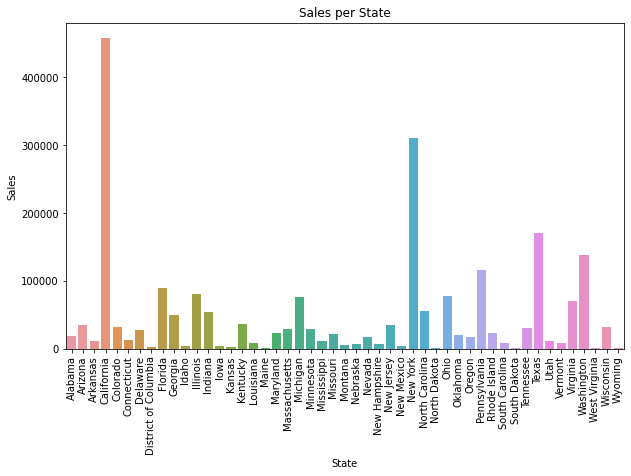

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', data=data_sales)
plt.xticks(rotation=90)
plt.title('Sales per State')
plt.show()


==> New York and California have the highest sales among states.

In [14]:
# Profit per State
data_profit=df.groupby(['Profit'],as_index=False).Profit.sum() #calculate profits for each state
data_profit

,Profit
0,-6599.9780
1,-3839.9904
2,-3701.8928
3,-3399.9800
4,-2929.4845
...,...
7282,4630.4755
7283,4946.3700
7284,5039.9856
7285,6719.9808


In [15]:
# correlation between sales and profit for weak areas
weak_areas = df.query('Profit <= 0')

weak_areas.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

,Sales,Profit
State,,
Texas,105054.0378,-36813.1875
Pennsylvania,78976.7420,-21602.8515
Ohio,51145.9660,-21737.9414
Florida,49400.7960,-8689.8295
California,42278.3660,-3769.6651
Illinois,39349.8120,-19495.4605
New York,28712.9800,-5031.1378
North Carolina,28590.4600,-11557.9854
Tennessee,17746.4970,-7257.0174


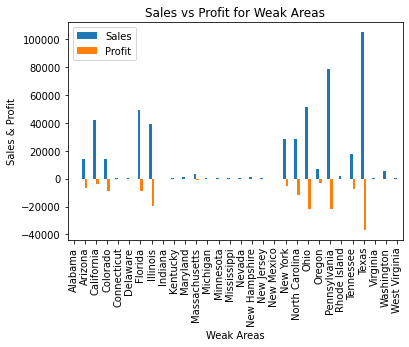

In [16]:

# relation between sales and profit for weak areas
weak_areas.groupby('State')[['Sales', 'Profit']].sum().plot(kind='bar')
plt.xlabel('Weak Areas')
plt.ylabel('Sales & Profit')
plt.title('Sales vs Profit for Weak Areas')
plt.show()



==> Texas has the highest Sales but also the lowest Profits

# Data Visualization

In [17]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of each category')

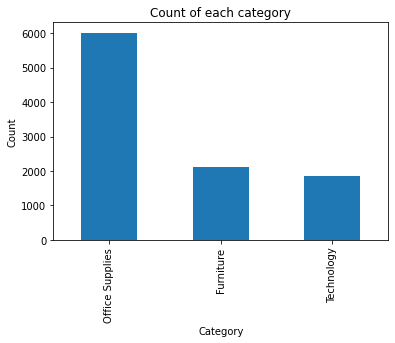

In [18]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of each category')

==> Office supplies category is the most popular category.

In [19]:
df_category=df.groupby('Category')[['Profit','Sales']].sum()
df_category

,Profit,Sales
Category,,
Furniture,18421.8137,741306.3133
Office Supplies,122364.6608,718735.2440
Technology,145454.9481,836154.0330


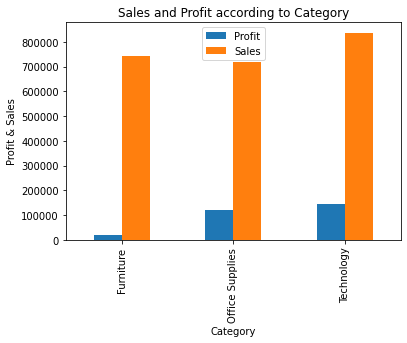

In [20]:
df_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Profit & Sales')
plt.title('Sales and Profit according to Category')
plt.show()

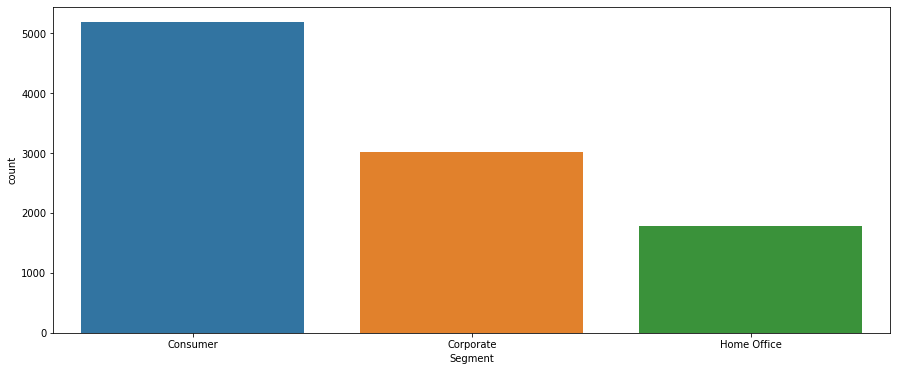

In [21]:
# explore segment trend of sales
plt.figure(figsize=(15,6))
sns.countplot(x='Segment', data=df)
plt.show()

==> Consumer has more interest in order to buy more products as compare to other two segment.

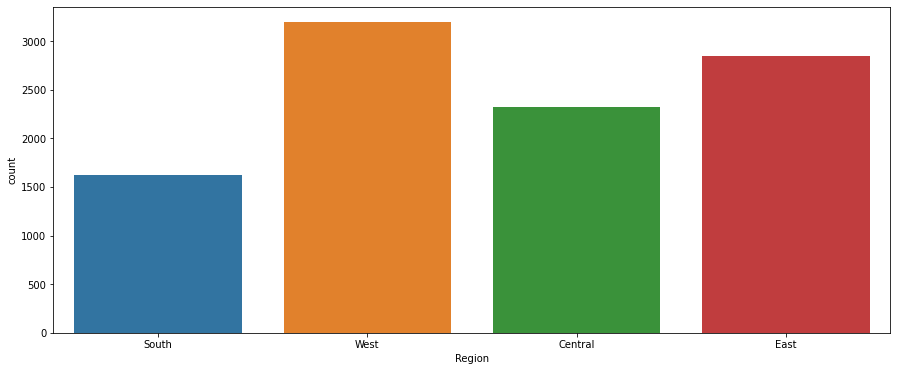

In [22]:
# Explore region trend 
plt.figure(figsize=(15,6))
sns.countplot(x='Region', data=df)
plt.show()

==> 'West' and 'East' regions are buying more products as compare to 'South' and 'Central

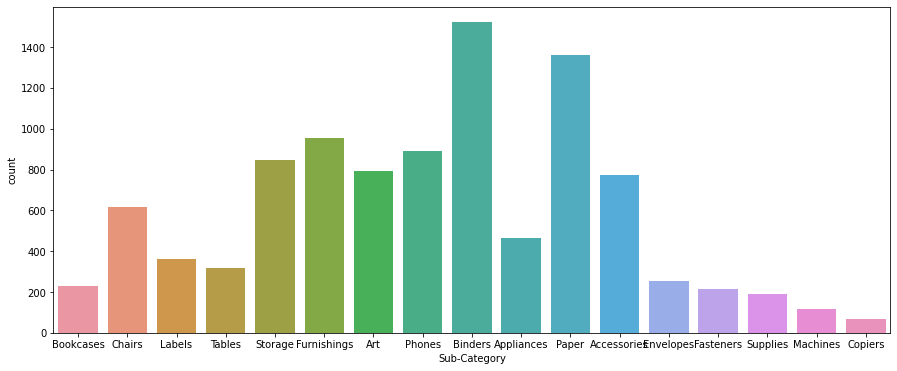

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='Sub-Category', data=df)
plt.show()

==> Binders is the most popular sub-Category.



*Conclusion*

In states:

    Texas has the lowest profit while California has the highest.
    North Dakota has the lowest sales while California has the highest .
    According to weak areas, Texas has the highest sales.

In category:

    Office supplies category is the most popular category.
    Furniture is the lowest category in profit.

In sub-category:

    The binders subcategory is the most popular subcategory.
    Tables subcategory is the least profitable.
    chairs and phones are the highest sales.

